## Домашнее задание к лекции «Случайные события. Случайные величины»
Текст задания см. на скриншоте http://prntscr.com/uh35yg

Смоделировать игру против лотерейного автомата типа “777”. Игрок платит 1 руб., после чего выпадает случайное целое число, равномерно распределенное от 0 до 999. При некоторых значениях числа игрок получает выигрыш.

- 777: 200 руб.
- 999: 100 руб.
- 555: 50 руб.
- 333: 15 руб.
- 111: 10 руб.
- *77: 5 руб.
- **7: 3 руб.
- *00: 2 руб.
- **0: 1 руб.

Вопросы:

Выгодна ли игра игроку?
Сколько в среднем приобретает или теряет игрок за одну игру?

In [7]:
import numpy as np

In [170]:
trials = 1000000      # Количество попыток, равное потраченных денег
prize= 0             # Выигрыш

In [171]:
random_number = np.random.randint(0, 1000, size=trials)
random_number

array([136, 779, 322, ..., 877, 259, 870])

In [172]:
prize_dict = {  777: 200,
                999: 100,
                555: 50,
                333: 15,
                111: 10 }

In [173]:
for number in random_number:

    if number in prize_dict:
        prize = prize +  prize_dict[number]

    elif number % 100 == 77:
        prize += 10
    elif number % 10 == 7:
        prize += 3
    elif number % 100 == 0:
        prize += 2
    elif number % 10 == 0:
        prize += 1
    else:
        continue
        
print(f'Игрок потратил: {trials}')
print(f'Игрок выиграл:  {prize}')
print(f'Вероятность выигрыша у лотерейного автомата:  {prize/trials}, {prize/trials:.1%}') # метод Монте-Карло
print(f'Итоговый выигрыш:  {prize-trials}')

Игрок потратил: 1000000
Игрок выиграл:  845447
Вероятность выигрыша у лотерейного автомата:  0.845447, 84.5%
Итоговый выигрыш:  -154553


In [174]:
# Вероятность выигрыша 84%, т.е.на  потраченный 1руб. мы получаем 84коп. выигрыша (в среднем), 
# Таким образом проигрыш с каждой игры будет 16 копеек, с 1000000 игр - проиграем 16000 рублей 



**Дополнительное задание повышенной сложности.**

Теоретически рассчитать средний выигрыш (проигрыш) и сравнить с результатами моделирования

– любая цифра

Вероятность выпадения:
- 777 =  1 \ 1000
- 999 =  1 \ 1000
- 555 =  1 \ 1000
- 333 =  1 \ 1000
- 111 =  1 \ 1000 

- *77 = 9 \ 1000 (всего 9 сотен и минус 777 которую учитываем отдельно),
- **7 = 90 \ 1000 (т.к. из выборки убираем *77 = 9 и 777),
- *00 = 10 \ 1000 (10 а не 9, т.к. НЕ исключаем 000) 
- **0 = 90 \ 1000

**Математическое ожидание** дискретной случайной величины Х вычисляется как сумма произведений значений Xi , которые принимает случайная ведличина Х, на соответствующие вероятности Рi: 
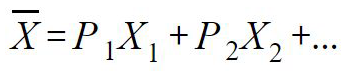

In [178]:
probability = 200*0.001 + 100*0.001 + 50*0.001 + 15*0.001 + 10*0.001 + 5*0.009 + 3*0.09 + 2*0.01 + 1*0.09 

print(f'Теоретически расчитанная вероятность выигрыша у лотерейного автомата:  {probability}, {probability:.1%}')

Теоретически расчитанная вероятность выигрыша у лотерейного автомата:  0.8, 80.0%
